[*********************100%%**********************]  1 of 1 completed


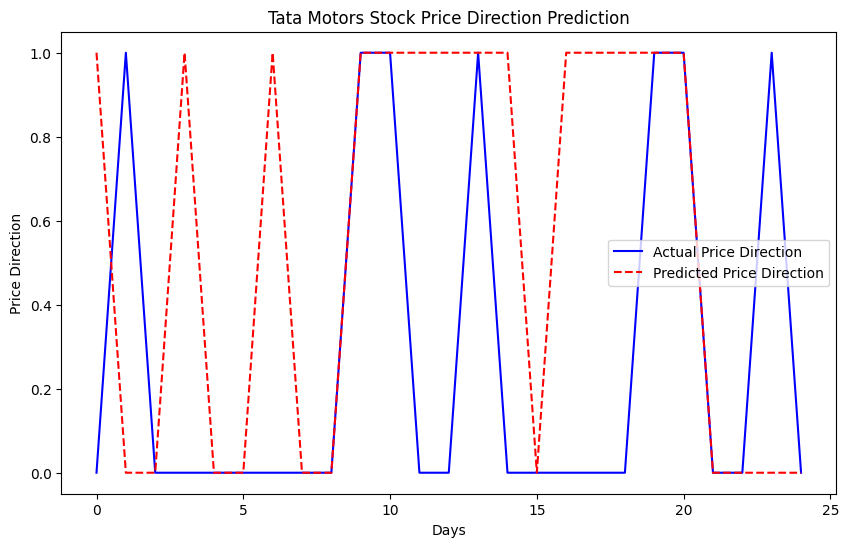

Accuracy: 56.00%
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.50      0.62        18
           1       0.36      0.71      0.48         7

    accuracy                           0.56        25
   macro avg       0.59      0.61      0.55        25
weighted avg       0.69      0.56      0.58        25



In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Function to fetch stock data using Yahoo Finance
def get_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

# Function to calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    close = data['Close']
    diff = close.diff(1)
    gain = diff.where(diff > 0, 0)
    loss = -diff.where(diff < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Function to prepare features and target for KNN classification
def prepare_data(data, target_col, window_size=14):
    data['RSI'] = calculate_rsi(data, window=window_size)
    data['Price_Direction'] = np.where(data[target_col].shift(-1) > data[target_col], 1, 0)
    data = data.dropna()

    X = data['RSI'].values.reshape(-1, 1)
    y = data['Price_Direction'].values

    return X, y

# Fetching stock data for Tata Motors (TATAMOTORS)
symbol = 'TATAMOTORS.BO'  # You can change the symbol if needed
start_date = '2022-01-01'
end_date = '2022-12-31'
stock_data = get_stock_data(symbol, start_date, end_date)

# Define the target column (Closing Price)
target_col = 'Close'

# Prepare data for KNN classification
X, y = prepare_data(stock_data, target_col)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=False)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Plot the predicted and actual results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Price Direction', color='blue')
plt.plot(y_pred, label='Predicted Price Direction', color='red', linestyle='dashed')
plt.title('Tata Motors Stock Price Direction Prediction')
plt.xlabel('Days')
plt.ylabel('Price Direction')
plt.legend()
plt.show()

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: {:.2%}".format(accuracy))
print("Classification Report:\n", classification_rep)
